In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

dataset = pd.read_csv('uaScoresDataFrame.csv')

print('First few rows of the dataset:')
print(dataset.head())
print("\nData types of each column:")
print(dataset.dtypes)
print("\nSummary statistics:")
print(dataset.describe())
print("\nMissing values per column:")
print(dataset.isnull().sum())

First few rows of the dataset:
   Unnamed: 0      UA_Name    UA_Country   UA_Continent  Housing  \
0           0       Aarhus       Denmark         Europe   6.1315   
1           1     Adelaide     Australia        Oceania   6.3095   
2           2  Albuquerque    New Mexico  North America   7.2620   
3           3       Almaty    Kazakhstan           Asia   9.2820   
4           4    Amsterdam   Netherlands         Europe   3.0530   

   Cost of Living  Startups  Venture Capital  Travel Connectivity  Commute  \
0           4.015    2.8270            2.512               3.5360  6.31175   
1           4.692    3.1365            2.640               1.7765  5.33625   
2           6.059    3.7720            1.493               1.4555  5.05575   
3           9.333    2.4585            0.000               4.5920  5.87125   
4           3.824    7.9715            6.107               8.3245  6.11850   

   ...  Safety  Healthcare  Education  Environmental Quality  Economy  \
0  ...  9.6165    


Columns used for analysis:
Index(['Housing', 'Cost of Living', 'Startups', 'Venture Capital',
       'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety',
       'Healthcare', 'Education', 'Environmental Quality', 'Economy',
       'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance',
       'Outdoors'],
      dtype='object')
Summary statistics of normalized data:
          Housing  Cost of Living    Startups  Venture Capital  \
count  266.000000      266.000000  266.000000       266.000000   
mean     0.646727        0.574594    0.459530         0.270252   
std      0.229448        0.244710    0.215284         0.255345   
min      0.000000        0.000000    0.000000         0.000000   
25%      0.514950        0.479500    0.309750         0.000000   
50%      0.672600        0.563050    0.421400         0.231750   
75%      0.831275        0.759550    0.579037         0.376475   
max      1.000000        1.000000    1.000000         1.000000   

       Travel Co

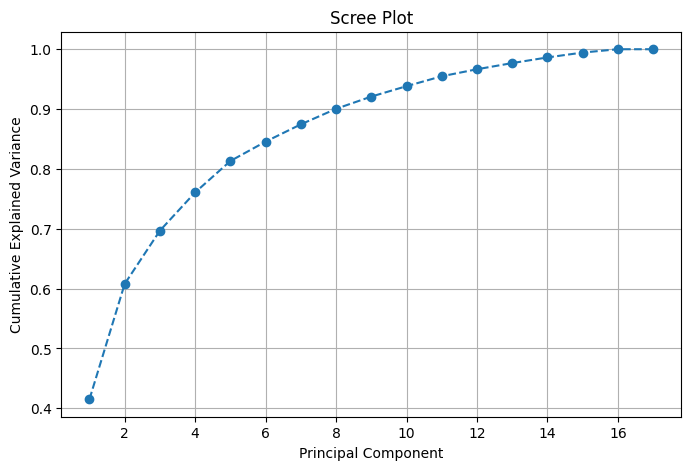


PCA Component Loadings (Variable Scores):
                             PC1        PC2        PC3       PC4       PC5  \
Housing                10.533147 -15.195793   0.768389 -1.322093 -4.285396   
Cost of Living          3.123515 -15.827100   4.298521 -1.301476 -2.706943   
Startups               -8.956911   1.261220   9.124488  2.420629  3.775443   
Venture Capital       -23.408546   2.563438   3.306103 -0.353607  2.332344   
Travel Connectivity   -14.464126  -0.808532 -10.105534  6.275755 -4.231729   
Commute                -3.989528  -3.462515  -4.991677 -0.908547 -1.916863   
Business Freedom       15.854451  11.193477   5.003362  1.258410 -2.299485   
Safety                 11.659811  -1.977676  -7.434021  2.494298  7.089029   
Healthcare             12.052023   3.750466  -2.112181  3.862112 -1.101058   
Education             -10.675430   7.601459  -2.897596 -0.598998 -3.198596   
Environmental Quality   7.742906   9.385246  -0.895746 -4.331154 -1.029093   
Economy              

In [4]:
dataset_num = dataset.drop(columns=['Unnamed: 0', 'UA_Name', 'UA_Country', 'UA_Continent'])
print("\nColumns used for analysis:")
print(dataset_num.columns) 
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(dataset_num)
dataset_minmax = pd.DataFrame(scaled_values, columns=dataset_num.columns)

print("Summary statistics of normalized data:")
print(dataset_minmax.describe())

scaled_data = preprocessing.scale(dataset_num.T)
print("Shape after transposing and scaling:", scaled_data.shape)


pca = PCA()
pca_fit = pca.fit(scaled_data)


explained_variance = pca_fit.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(explained_variance)

cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()


variable_scores = pca_fit.transform(scaled_data)

pca_loadings = pd.DataFrame(
    variable_scores,
    index=dataset_num.columns,
    columns=[f"PC{i+1}" for i in range(variable_scores.shape[1])]
)
print("\nPCA Component Loadings (Variable Scores):")
print(pca_loadings)


In [5]:
basic_needs = ['Housing', 'Healthcare', 'Safety', 'Environmental Quality']
economic_opportunity = ['Economy', 'Startups', 'Venture Capital', 'Business Freedom', 'Taxation']
mobility_infrastructure = ['Travel Connectivity', 'Commute', 'Internet Access']
quality_of_life = ['Leisure & Culture', 'Education', 'Tolerance', 'Outdoors', 'Cost of Living']

dataset_minmax['Basic_Needs_Index'] = dataset_minmax[basic_needs].mean(axis=1)
dataset_minmax['Economic_Opportunity_Index'] = dataset_minmax[economic_opportunity].mean(axis=1)
dataset_minmax['Mobility_Infrastructure_Index'] = dataset_minmax[mobility_infrastructure].mean(axis=1)
dataset_minmax['Quality_of_Life_Index'] = dataset_minmax[quality_of_life].mean(axis=1)

sub_indices = ['Basic_Needs_Index', 'Economic_Opportunity_Index', 
               'Mobility_Infrastructure_Index', 'Quality_of_Life_Index']
dataset_minmax['Composite_Index'] = dataset_minmax[sub_indices].mean(axis=1)

print("Summary of Sub-indices and Composite Index:")
print(dataset_minmax[sub_indices + ['Composite_Index']].describe())

Summary of Sub-indices and Composite Index:
       Basic_Needs_Index  Economic_Opportunity_Index  \
count         266.000000                  266.000000   
mean            0.648321                    0.494058   
std             0.109887                    0.132878   
min             0.382148                    0.103684   
25%             0.562531                    0.405749   
50%             0.654282                    0.490774   
75%             0.736916                    0.579666   
max             0.916188                    0.908917   

       Mobility_Infrastructure_Index  Quality_of_Life_Index  Composite_Index  
count                     266.000000             266.000000       266.000000  
mean                        0.493678               0.544838         0.545224  
std                         0.154536               0.102300         0.088440  
min                         0.010541               0.152319         0.240592  
25%                         0.389973               0.490

In [ ]:
# Adding custom weights to each sub-index
weights_basic = {'Housing': 0.2, 'Healthcare': 0.4, 'Safety': 0.2, 'Environmental Quality': 0.2}
weights_econ = {'Economy': 0.3, 'Startups': 0.2, 'Venture Capital': 0.1, 'Business Freedom': 0.25, 'Taxation': 0.15}
weights_mob = {'Travel Connectivity': 0.4, 'Commute': 0.3, 'Internet Access': 0.3}
weights_qol = {'Leisure & Culture': 0.25, 'Education': 0.25, 'Tolerance': 0.2, 'Outdoors': 0.15, 'Cost of Living': 0.15}

def calculate_weighted_average(row, weights):
    weighted_sum = 0
    total_weight = sum(weights.values())
    
    for column, weight in weights.items():
        weighted_sum += row[column] * weight
    
    return weighted_sum / total_weight

dataset_minmax['Weighted_Basic_Needs'] = dataset_minmax.apply(calculate_weighted_average, 
                                                                axis=1, 
                                                             weights=weights_basic)
dataset_minmax['Weighted_Economic_Opportunity'] = dataset_minmax.apply(calculate_weighted_average, 
                                                                        axis=1, 
                                                                        weights=weights_econ)
dataset_minmax['Weighted_Mobility_Infrastructure'] = dataset_minmax.apply(calculate_weighted_average, 
                                                                           axis=1, 
                                                                           weights=weights_mob)
dataset_minmax['Weighted_Quality_of_Life'] = dataset_minmax.apply(calculate_weighted_average, 
                                                                 axis=1, 
                                                                 weights=weights_qol)

dataset_minmax['Weighted_Composite_Index'] = dataset_minmax[['Weighted_Basic_Needs', 
                                                             'Weighted_Economic_Opportunity', 
                                                             'Weighted_Mobility_Infrastructure', 
                                                             'Weighted_Quality_of_Life']].mean(axis=1)

print("Summary of Weighted Sub-indices and Composite Index:")
print(dataset_minmax[['Weighted_Basic_Needs', 
                      'Weighted_Economic_Opportunity', 
                      'Weighted_Mobility_Infrastructure', 
                      'Weighted_Quality_of_Life', 
                      'Weighted_Composite_Index']].describe())

Summary of Weighted Sub-indices and Composite Index:
       Weighted_Basic_Needs  Weighted_Economic_Opportunity  \
count            266.000000                     266.000000   
mean               0.664496                       0.534116   
std                0.112330                       0.132077   
min                0.395376                       0.082763   
25%                0.572893                       0.443902   
50%                0.675400                       0.553264   
75%                0.756519                       0.627317   
max                0.913088                       0.900429   

       Weighted_Mobility_Infrastructure  Weighted_Quality_of_Life  \
count                        266.000000                266.000000   
mean                           0.475331                  0.537546   
std                            0.156208                  0.108204   
min                            0.010619                  0.157642   
25%                            0.369914    

Rows matched: 82 / 266 UA cities
Pearson r between Composite_Index and Global Overall Score: 0.761

Correlation matrix (UA sub‑indices vs Global sub‑scores):
                               Stability  Healthcare  Culture & Environment  \
Basic_Needs_Index                  0.671       0.304                  0.139   
Economic_Opportunity_Index         0.571       0.522                  0.369   
Mobility_Infrastructure_Index      0.528       0.488                  0.384   
Quality_of_Life_Index              0.392       0.412                  0.431   

                               Education  Infrastructure  
Basic_Needs_Index                  0.305           0.320  
Economic_Opportunity_Index         0.472           0.224  
Mobility_Infrastructure_Index      0.144           0.564  
Quality_of_Life_Index              0.268           0.076  


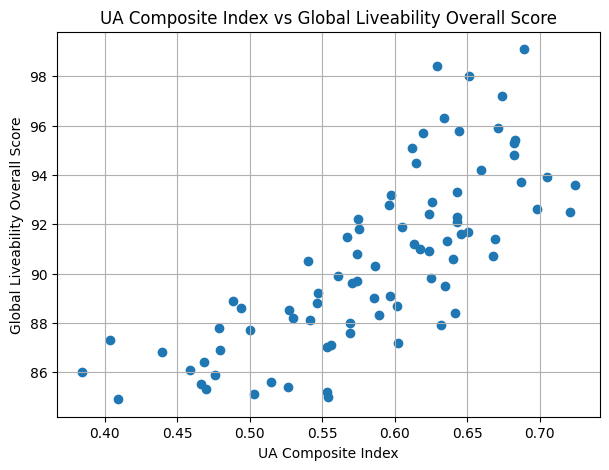

In [14]:
live_df = pd.read_csv('movingtoGlobalLiveabilityIndex.csv')

live_df['City'] = live_df['City'].str.strip().str.lower()
live_df['Country'] = live_df['Country'].str.strip().str.lower()

ua_df = dataset[['UA_Name', 'UA_Country']].copy()
ua_df.columns = ['City', 'Country']
ua_df['City'] = ua_df['City'].str.strip().str.lower()
ua_df['Country'] = ua_df['Country'].str.strip().str.lower()

ua_df = pd.concat([ua_df, dataset_minmax[['Basic_Needs_Index',
                                           'Economic_Opportunity_Index',
                                           'Mobility_Infrastructure_Index',
                                           'Quality_of_Life_Index',
                                           'Composite_Index']]], axis=1)

merged = ua_df.merge(live_df,
                     on=['City','Country'],
                     how='inner',
                     suffixes=('_UA','_Live'))

print(f"Rows matched: {len(merged)} / {len(ua_df)} UA cities")

correlation = merged[['Composite_Index','Overall Score']].corr().iloc[0,1]
print(f"Pearson r between Composite_Index and Global Overall Score: {correlation:.3f}")

subcols_ua = ['Basic_Needs_Index','Economic_Opportunity_Index','Mobility_Infrastructure_Index','Quality_of_Life_Index']
subcols_live = ['Stability','Healthcare','Culture & Environment','Education','Infrastructure']
correlation_matrix = merged[subcols_ua + subcols_live].corr().loc[subcols_ua, subcols_live]
print("\nCorrelation matrix (UA sub‑indices vs Global sub‑scores):")
print(correlation_matrix.round(3))

plt.figure(figsize=(7,5))
plt.scatter(merged['Composite_Index'], merged['Overall Score'])
plt.xlabel('UA Composite Index')
plt.ylabel('Global Liveability Overall Score')
plt.title('UA Composite Index vs Global Liveability Overall Score')
plt.grid(True)
plt.show()